## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import random
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
mouse_id=merge_df["Mouse ID"].nunique()
mouse_id

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=merge_df[["Mouse ID", "Timepoint"]].value_counts()
duplicate_mouse.head()


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df=merge_df.set_index("Mouse ID")

mouse_trap=df.loc[["g989"][:]]
print(mouse_trap)


         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_house= merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [7]:
# Checking the number of mice in the clean DataFrame.
check_df=clean_house.set_index("Mouse ID")

check_trap=check_df.loc[["g989"][:]]
print(check_trap)


         Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               48.786801                 0  
g989               51.745156                 0  
g989               51.325852                 1  
g989               55.326

## Summary Statistics

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
table=clean_house[["Tumor Volume (mm3)","Drug Regimen"]]
table["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
#tumor =clean_house["Tumor Volume (mm3)"]

print(f"The mean Drug Regime of th study is: {round(table.mean(),2)}")

print(f"The median Drug Regime of th study is: {round(table.median(),2)}")

print(f"The standard deviation of Drug Regime is: {round(table.std(),2)}")

var_numpy = np.var(table,ddof = 0)
print(f"The Drug Regime variance using the NumPy module is {var_numpy}")

#why = table.sample(10)
#print(f"The SEM value for the sample Drug Regime data is {sem(why.Tumor Volume (mm3))}")



The mean Drug Regime of th study is: Tumor Volume (mm3)    50.45
dtype: float64
The median Drug Regime of th study is: Tumor Volume (mm3)    48.95
dtype: float64
The standard deviation of Drug Regime is: Tumor Volume (mm3)    8.9
dtype: float64
The Drug Regime variance using the NumPy module is Tumor Volume (mm3)    79.24928
dtype: float64


In [10]:
# Assemble the resulting series into a single summary dataframe.
Tumor_Statistics=pd.DataFrame({"":["Mean","Median","Standard Deviation","Variance"],
                              "Tumor Volume (mm3)":[50.45,48.95,8.902,79.24]})
Tumor_Statistics

,,Tumor Volume (mm3)
0,Mean,50.450
1,Median,48.950
2,Standard Deviation,8.902
3,Variance,79.240


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Drugs= clean_house["Drug Regimen"].unique()
Drugs


array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [13]:
Drug_Measurments=table.groupby(["Drug Regimen"]).count()
Drug_Measurments

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


([<matplotlib.axis.XTick at 0x2490a7dfaf0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

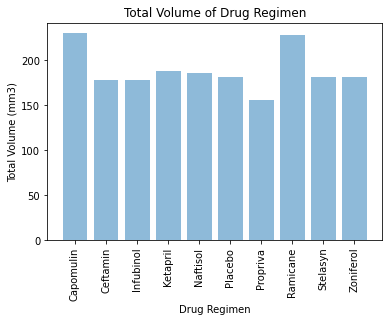

In [14]:
Tumor_Volume= [230,178,178,188,186,181,156,228,181,182]
x_axis=np.arange(len(Tumor_Volume))

plt.bar(x_axis,Tumor_Volume,alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Total Volume of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Volume (mm3)")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

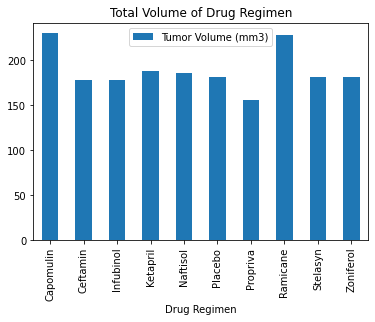

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Use DataFrame.plot() in order to create a bar chart of the data
Drug_Measurments.plot(kind="bar")

# Set a title for the chart
plt.title("Total Volume of Drug Regimen")
plt.show()
plt.tight_layout()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex=clean_house["Sex"].value_counts()
Sex


Male      958
Female    930
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

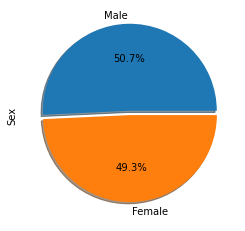

In [17]:
explode= (0.05,0)
Sex.plot(kind="pie",autopct="%1.1f%%", shadow=True,explode=explode)


([<matplotlib.patches.Wedge at 0x2490acbc160>,
 [Text(-0.026088765863832748, 1.1196961089044215, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.014441995388907414, 0.6198317745720905, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

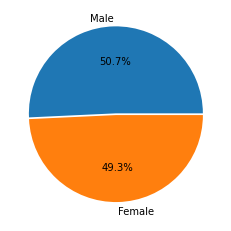

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Ratio=[958,930]
Male_vs_Female=["Male","Female"]
explode= (0.02,0)

plt.pie(Ratio,explode=explode,labels=Male_vs_Female,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [19]:
clean_house

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Time=clean_house[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
Point=Time.groupby("Mouse ID").max()
Time_Point=pd.DataFrame(Point)
Time_Point["Drug Regimen"].unique()
Time_Point=Time_Point.reset_index(drop=False)

Capomulin=Time_Point.loc[Time_Point["Drug Regimen"]=="Capomulin"]
Capomulin_Volume=Capomulin["Tumor Volume (mm3)"]

Ramicane=Time_Point.loc[Time_Point["Drug Regimen"]=="Ramicane"]
Ramicane_Volume=Ramicane["Tumor Volume (mm3)"]

Infubinol=Time_Point.loc[Time_Point["Drug Regimen"]=="Infubinol"]
Infubinol_Volume=Infubinol["Tumor Volume (mm3)"]

Ceftamin=Time_Point.loc[Time_Point["Drug Regimen"]=="Ceftamin"]
Ceftamin_Volume=Ceftamin["Tumor Volume (mm3)"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


0.25    45.000000
0.50    45.893720
0.75    46.749006
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Volumes is: 45.0
The upper quartile of Volumes is: 46.74900552
The interquartile range of Volumes is: 1.7490055199999972
The the median of Volumes is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

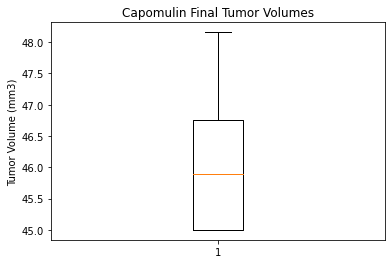

In [133]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Capomulin_Volume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volumes is: {lowerq}")
print(f"The upper quartile of Volumes is: {upperq}")
print(f"The interquartile range of Volumes is: {iqr}")
print(f"The the median of Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot1=Capomulin["Tumor Volume (mm3)"]
plt.boxplot(plot1)
plt.title('Capomulin Final Tumor Volumes')
plt.ylabel("Tumor Volume (mm3)")

0.25    45.000000
0.50    45.521875
0.75    46.343832
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Volumes is: 45.0
The upper quartile of Volumes is: 46.34383237
The interquartile range of Volumes is: 1.3438323700000012
The the median of Volumes is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

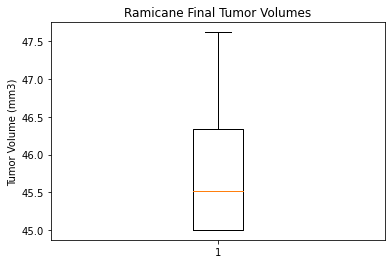

In [127]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ramicane_Volume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volumes is: {lowerq}")
print(f"The upper quartile of Volumes is: {upperq}")
print(f"The interquartile range of Volumes is: {iqr}")
print(f"The the median of Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot2=Ramicane["Tumor Volume (mm3)"]
plt.boxplot(plot2)
plt.title('Ramicane Final Tumor Volumes')
plt.ylabel("Tumor Volume (mm3)")

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Volumes is: 54.04860769
The upper quartile of Volumes is: 65.52574285
The interquartile range of Volumes is: 11.477135160000003
The the median of Volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

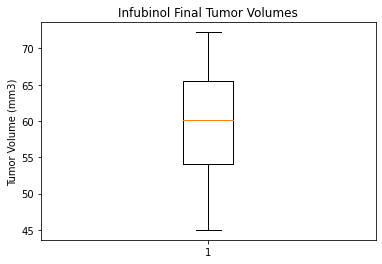

In [128]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Infubinol_Volume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volumes is: {lowerq}")
print(f"The upper quartile of Volumes is: {upperq}")
print(f"The interquartile range of Volumes is: {iqr}")
print(f"The the median of Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot3=Infubinol["Tumor Volume (mm3)"]
plt.boxplot(plot3)
plt.title('Infubinol Final Tumor Volumes')
plt.ylabel("Tumor Volume (mm3)")

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The lower quartile of Volumes is: 48.72207785
The upper quartile of Volumes is: 64.29983003
The interquartile range of Volumes is: 15.577752179999997
The the median of Volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Text(0, 0.5, 'Tumor Volume (mm3)')

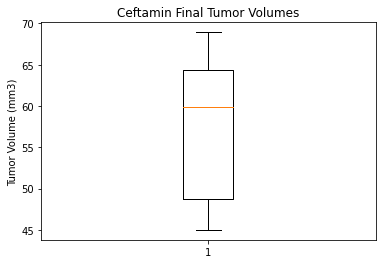

In [129]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ceftamin_Volume.quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Volumes is: {lowerq}")
print(f"The upper quartile of Volumes is: {upperq}")
print(f"The interquartile range of Volumes is: {iqr}")
print(f"The the median of Volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot4=Ceftamin["Tumor Volume (mm3)"]
plt.boxplot(plot4)
plt.title('Ceftamin Final Tumor Volumes')
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

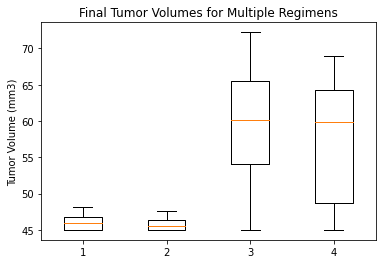

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot5=[plot1,plot2,plot3,plot4]
plt.boxplot(plot5)
plt.title("Final Tumor Volumes for Multiple Regimens")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

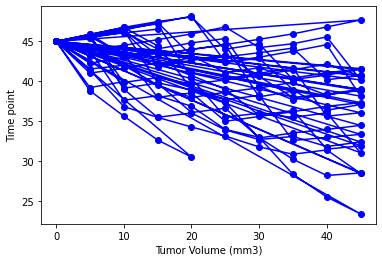

In [152]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
regimen_capomulin=Time.loc[Time["Drug Regimen"]=="Capomulin"]

y_values = regimen_capomulin["Tumor Volume (mm3)"]
x_values = regimen_capomulin["Timepoint"]
plt.plot(x_values,y_values,marker='o',color="blue")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Time point')
plt.show()


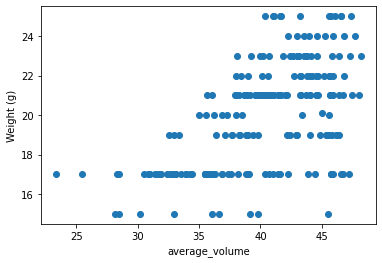

In [174]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen_capomulin=Time.loc[Time["Drug Regimen"]=="Capomulin"]
average_volume=regimen_capomulin.groupby("Tumor Volume (mm3)").mean()
Regimen_average_Volume= average_volume.reset_index(drop=False)

x_values = Regimen_average_Volume["Tumor Volume (mm3)"]
y_values = Regimen_average_Volume['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('average_volume')
plt.ylabel('Weight (g)')
plt.show()


## Correlation and Regression

The r-squared is: 0.3350069384102088


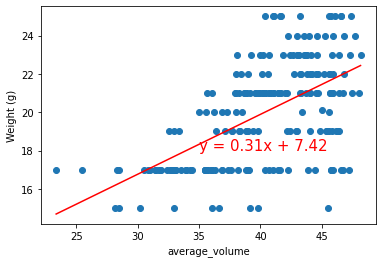

In [181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Regimen_average_Volume["Tumor Volume (mm3)"]
y_values = Regimen_average_Volume['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,18),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('average_volume')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()